# Image Segmentation using K-Means 

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

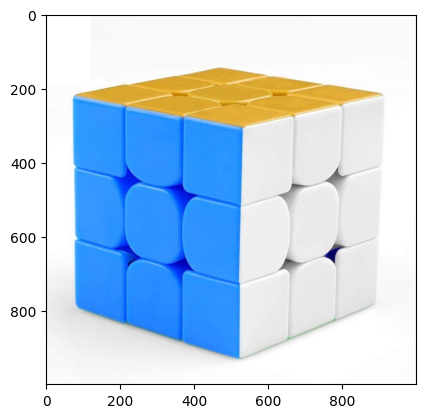

In [33]:
img = cv2.imread('cube.jpg')
plt.imshow(img)

In [34]:
display(img.shape)

(1000, 1000, 3)

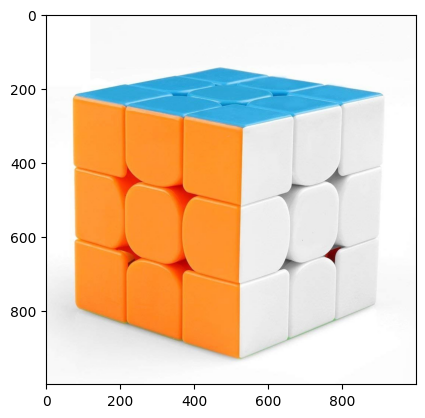

In [35]:
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)


In [36]:
pixel_values = img_RGB.reshape((-1, 3))
pixel_values.shape
pixel_values = np.float32(pixel_values)

In [37]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [38]:
k = 5
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [39]:
centers = np.uint8(centers)
display('Before Flattening: ' , labels.shape)
labels = labels.flatten()
display('After Flattening: ' , labels.shape)

'Before Flattening: '

(1000000, 1)

'After Flattening: '

(1000000,)

In [40]:
segmented_image = centers[labels]

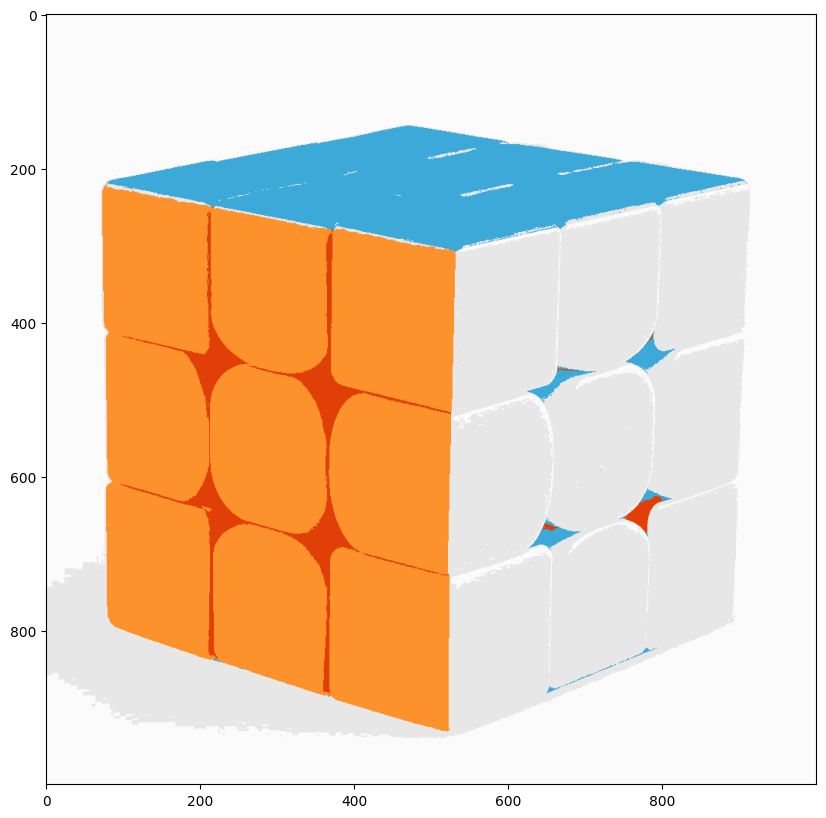

In [41]:
segmented_image = segmented_image.reshape(img.shape)

plt.figure(figsize=(12, 10))
plt.imshow(segmented_image)
plt.show()

In [42]:
masked_image0 = np.copy(img).reshape((-1, 3))
masked_image1 = np.copy(img).reshape((-1, 3))
masked_image2 = np.copy(img).reshape((-1, 3))

#Disable cluster 0
cluster = 0
masked_image0[labels == cluster] = [0, 0, 0]

#Disable cluster 1
cluster = 1
masked_image1[labels == cluster] = [0, 0, 0]

#Disable cluster 2
cluster = 2
masked_image2[labels == cluster] = [0, 0, 0]

masked_image0 = masked_image0.reshape(img.shape)
masked_image1 = masked_image1.reshape(img.shape)
masked_image2 = masked_image2.reshape(img.shape)

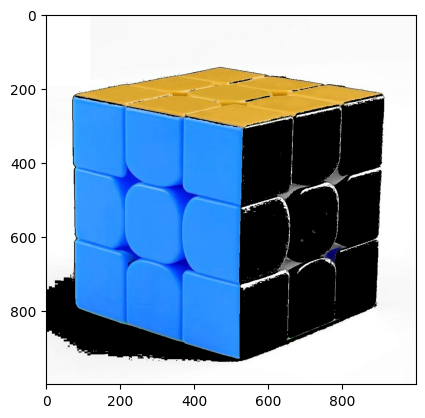

In [43]:
plt.imshow(masked_image0)

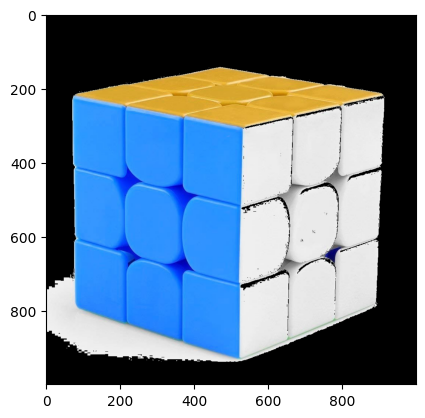

In [44]:
plt.imshow(masked_image1)

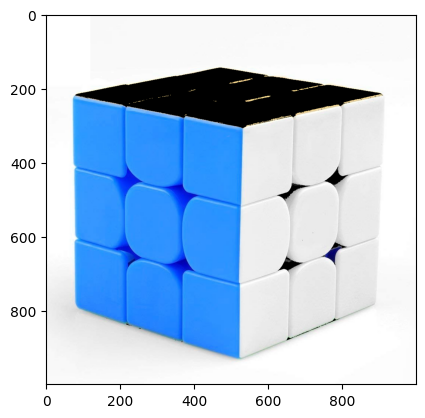

In [45]:
plt.imshow(masked_image2)